In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import  MinMaxScaler
import logging
import random
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import seaborn as sns

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#import geopandas as gpd

In [3]:
#coastline = gpd.read_file("maltacoast/coastline_polygon.shp")

# Read Data

In [4]:
station = 'CAVT'

stations_sea_rms = pd.read_parquet(f"Processed Data/15.03.2025 Data/{station}.parquet")

#random seed for data splitting
randseed = 27

# Split Data

In [5]:
mlvariables = pd.DataFrame(stations_sea_rms)

X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)] #input variable is columns that start with station name
Y = mlvariables.loc[:, ~mlvariables.columns.str.startswith(station) & (mlvariables.columns != 'sea_mode')] #target variable are the remaining columns
T = mlvariables.index.tolist() #Time series

In [6]:
mlvariables

,CAVT/Z/0.05-0.2,CAVT/Z/0.2-0.35,CAVT/Z/0.35-0.5,CAVT/Z/0.5-0.65,CAVT/Z/0.65-0.8,CAVT/Z/0.8-0.95,CAVT/Z/0.95-1.1,CAVT/Z/1.1-1.25,CAVT/Z/1.25-1.4,CAVT/Z/1.4-1.55,...,CAVT/E/1.7-1.85,CAVT/E/1.85-2.0,"(37.5625, 12.75)","(37.5625, 12.791667938232422)","(37.5625, 12.708333969116211)","(37.5625, 12.833333969116211)","(37.5625, 12.666667938232422)",sea_mean,sea_median,sea_mode
index,,,,,,,,,,,,,,,,,,,,,
2019-06-24 08:00:00+00:00,3.683709e-08,1.018390e-07,5.384380e-07,2.557570e-07,8.280396e-08,4.407553e-08,2.883168e-08,2.045966e-08,2.269697e-08,8.060031e-08,...,2.480586e-08,2.296676e-08,0.435,0.429,0.442,0.424,0.453,0.4366,0.435,0.424
2019-06-24 09:00:00+00:00,1.210383e-10,6.202041e-11,7.118070e-11,4.776387e-11,3.582159e-11,2.596192e-11,1.512850e-11,2.356319e-11,2.047554e-11,1.791821e-11,...,2.729694e-11,9.469846e-13,0.442,0.438,0.448,0.433,0.457,0.4436,0.442,0.433
2019-06-24 10:00:00+00:00,1.207082e-10,6.169074e-11,7.108866e-11,4.773931e-11,3.580411e-11,2.592426e-11,1.505469e-11,2.354528e-11,2.046387e-11,1.790933e-11,...,2.727849e-11,9.364654e-13,0.433,0.429,0.438,0.425,0.445,0.4340,0.433,0.425
2019-06-24 11:00:00+00:00,1.207071e-10,6.168668e-11,7.109127e-11,4.774122e-11,3.580254e-11,2.592134e-11,1.505347e-11,2.354518e-11,2.046454e-11,1.790848e-11,...,2.727845e-11,9.364411e-13,0.429,0.426,0.433,0.422,0.439,0.4298,0.429,0.422
2019-06-24 12:00:00+00:00,1.207085e-10,6.169034e-11,7.108904e-11,4.773930e-11,3.580314e-11,2.592429e-11,1.505377e-11,2.354591e-11,2.046370e-11,1.790918e-11,...,2.727841e-11,9.364415e-13,0.431,0.429,0.433,0.426,0.438,0.4314,0.431,0.426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-02 20:00:00+00:00,6.047949e-08,1.504244e-07,4.699447e-07,3.076619e-07,1.650699e-07,1.071070e-07,8.100968e-08,6.116621e-08,5.139895e-08,4.182036e-08,...,2.457596e-08,2.747946e-08,0.991,0.942,1.035,0.882,1.080,0.9860,0.991,0.882
2020-10-02 21:00:00+00:00,7.303015e-08,1.764400e-07,5.606950e-07,3.284273e-07,1.692061e-07,1.133473e-07,9.641768e-08,6.583327e-08,6.019159e-08,4.498858e-08,...,2.686063e-08,2.885410e-08,1.113,1.053,1.166,0.983,1.218,1.1066,1.113,0.983
2020-10-02 22:00:00+00:00,7.914107e-08,2.325044e-07,6.518977e-07,3.181612e-07,1.801597e-07,1.317560e-07,1.042546e-07,7.261424e-08,6.555301e-08,5.031567e-08,...,3.112151e-08,2.996240e-08,1.330,1.260,1.393,1.177,1.450,1.3220,1.330,1.177


In [7]:
#scale values between 0 and 1
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

#fit the scalers
scaler_x.fit(X) 
scaler_y.fit(Y)

MinMaxScaler()

In [8]:
#apply the scalers
Xscale = scaler_x.transform(X) 
Yscale = scaler_y.transform(Y)

In [9]:
#number of chunks in training/test set
nchunks = 40

#number of ks for kfold cross validation
kfolds = 5

lenchunk = round(Xscale.shape[0]/nchunks)

In [10]:
#Generates k-th datasets for Cross Validation 
list_of_dataset = [{'idx': [], 'XscaleTrain': [], 'YscaleTrain': [], 'XscaleTest': [], 'YscaleTest': []} for number in range(kfolds)]

In [11]:
#split data into 40 chunks (or nchunks)
all_chunks = np.array_split(np.arange(Xscale.shape[0]), nchunks)

#random shuffle of chunks
random.seed(randseed)
random.shuffle(all_chunks)

#this method only works if nchunks is perfectly divisible by kfolds (eg 40/5 = 8)
if nchunks % kfolds != 0:
    raise ValueError("Number of chunks must be divisible by number of folds.")

nchunks_per_fold = nchunks // kfolds

#assign chunks to folds
for i in range(kfolds):
    test_chunks = all_chunks[i*nchunks_per_fold : (i+1)*nchunks_per_fold] #separate date from chunk i=1: 0 to 7, i=2: 8 to 15...
    train_chunks = all_chunks[ : i*nchunks_per_fold] + all_chunks[(i+1)*nchunks_per_fold:] #one set for test set, remaining for training
    train_idx = np.concatenate(train_chunks)
    test_idx = np.concatenate(test_chunks)
    
    list_of_dataset[i]['idx'] = train_idx
    list_of_dataset[i]['XscaleTrain'] = Xscale[train_idx, :]
    list_of_dataset[i]['YscaleTrain'] = Yscale[train_idx, :]
    list_of_dataset[i]['XscaleTest'] = Xscale[test_idx, :]
    list_of_dataset[i]['YscaleTest'] = Yscale[test_idx, :]

In [12]:
len(list_of_dataset[0]['idx'])

8961

# Build and train RF Regressor

In [13]:
#analysis of results showed that for WDD, the best R2 and MAE were achieved for both sea_mean and sea_median on the same set of hyperparameters

# random forest maximum depth     
RF_max_depth = 30

# random forest number of estimators  
RF_n_estimators = 200

# random forest maximum features 
RF_max_features = 'sqrt'

# random forest min samples to split
RF_min_samples_split = 2

#random forest min samples per leaf
RF_min_samples_leaf = 1

In [14]:
RF_model = RandomForestRegressor(bootstrap = True,
                                 max_depth=RF_max_depth,
                                 n_estimators=RF_n_estimators,
                                 max_features= RF_max_features,
                                 min_samples_split = RF_min_samples_split,
                                 min_samples_leaf = RF_min_samples_leaf,
                                 verbose=1)

In [15]:
#Initiliaze the empty variables
Ypred = None
YTest = None

In [16]:
#Applies the learning/prediction to the k datasets
Ypred_kfold = []
YTest_kfold = []

for i, dic in enumerate(list_of_dataset):
    Ypred = None
    YTest = None
    
    #Fits the model to training data
    RF_model.fit(dic['XscaleTrain'], dic['YscaleTrain'])
    
    #Predicts the sea wave data by using the testing data
    ypred  = RF_model.predict(dic['XscaleTest'])
    
    #Inverts the scaling of the data and stores the results in the predicted/testing arrays
    Ypred = scaler_y.inverse_transform(ypred)
    YTest = scaler_y.inverse_transform(dic['YscaleTest'])
    
    #Append to kfold results
    Ypred_kfold.append(Ypred)
    YTest_kfold.append(YTest)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   19.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   20.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   20.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   19.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

# Compute evaluation metrics and save data to parquet

In [33]:
results = []

#the names of the target variables are the last eight columns of the station data
target_names = mlvariables.columns[-8:-1].tolist()
for f in range(kfolds):
    Ypred = Ypred_kfold[f]
    YTest = YTest_kfold[f]

    #convert to df to save the data
    Ypred_df = pd.DataFrame(Ypred)
    YTest_df = pd.DataFrame(YTest)

    #save to parquet to preserve dat
    Ypred_df.to_parquet(f"results/kfold_data/{station}/fold{f}_Ypred.parquet", engine="pyarrow")
    YTest_df.to_parquet(f"results/kfold_data/{station}/fold{f}_YTest.parquet", engine="pyarrow")
    
    for i, target in enumerate(target_names):
        mae = mean_absolute_error(YTest[:, i], Ypred[:, i])
        mse = mean_squared_error(YTest[:, i], Ypred[:, i])
        rmse = np.sqrt(mse)
        r2 = r2_score(YTest[:, i], Ypred[:, i])
    
        #append the results as a row
        results.append([f, station, target, RF_max_depth, RF_n_estimators, RF_max_features, mae, mse, rmse, r2])

#creates results dataframe
results_df = pd.DataFrame(results, columns=["Fold", "Station", "Target Variable", "RF_max_depth", "RF_n_estimators", "RF_max_features", "MAE", "MSE", "RMSE", "R2"])

In [34]:
results_df

,Fold,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2
0,0,CAVT,"(37.5625, 12.75)",30,200,sqrt,0.120276,0.034177,0.184871,0.822522
1,0,CAVT,"(37.5625, 12.791667938232422)",30,200,sqrt,0.116850,0.031856,0.178482,0.822758
2,0,CAVT,"(37.5625, 12.708333969116211)",30,200,sqrt,0.123883,0.036586,0.191274,0.823435
3,0,CAVT,"(37.5625, 12.833333969116211)",30,200,sqrt,0.113101,0.029401,0.171467,0.823632
4,0,CAVT,"(37.5625, 12.666667938232422)",30,200,sqrt,0.128173,0.039419,0.198543,0.825988
5,0,CAVT,sea_mean,30,200,sqrt,0.119997,0.034024,0.184456,0.824425
6,0,CAVT,sea_median,30,200,sqrt,0.120283,0.034181,0.184882,0.822499
7,1,CAVT,"(37.5625, 12.75)",30,200,sqrt,0.152769,0.055770,0.236156,0.834759
8,1,CAVT,"(37.5625, 12.791667938232422)",30,200,sqrt,0.148864,0.052841,0.229873,0.832219
9,1,CAVT,"(37.5625, 12.708333969116211)",30,200,sqrt,0.156722,0.058831,0.242551,0.838293


# Evaluate k-fold results

In [35]:
sea_mean_results = results_df[(results_df["Target Variable"] == "sea_mean")]
sea_mean_results.describe()

,Fold,RF_max_depth,RF_n_estimators,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,30.0,200.0,0.138161,0.045946,0.212148,0.850343
std,1.581139,0.0,0.0,0.022350,0.014892,0.034272,0.031919
min,0.000000,30.0,200.0,0.116028,0.031395,0.177187,0.823155
25%,1.000000,30.0,200.0,0.119997,0.034024,0.184456,0.824425
50%,2.000000,30.0,200.0,0.133355,0.042184,0.205388,0.836915
75%,3.000000,30.0,200.0,0.152407,0.055495,0.235574,0.871979
max,4.000000,30.0,200.0,0.169018,0.066633,0.258133,0.895242


In [36]:
sea_median_results = results_df[(results_df["Target Variable"] == "sea_median")]
sea_median_results.describe()

,Fold,RF_max_depth,RF_n_estimators,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,30.0,200.0,0.138453,0.046085,0.212422,0.849276
std,1.581139,0.0,0.0,0.022515,0.015111,0.034676,0.032690
min,0.000000,30.0,200.0,0.116142,0.031377,0.177135,0.822161
25%,1.000000,30.0,200.0,0.120283,0.034181,0.184882,0.822499
50%,2.000000,30.0,200.0,0.133478,0.041934,0.204779,0.834758
75%,3.000000,30.0,200.0,0.152756,0.055768,0.236153,0.871831
max,4.000000,30.0,200.0,0.169605,0.067164,0.259159,0.895133


# Plot some Data

In [37]:
#find the best performing fold
best_model_R2 = sea_mean_results.loc[sea_mean_results["R2"].idxmax()]
print(best_model_R2)

Fold                      2
Station                CAVT
Target Variable    sea_mean
RF_max_depth             30
RF_n_estimators         200
RF_max_features        sqrt
MAE                0.133355
MSE                0.042184
RMSE               0.205388
R2                 0.895242
Name: 19, dtype: object


Set the best fold

In [38]:
bestfoldnum = 2

In [39]:
best_Ypred = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_Ypred.parquet")
best_YTest = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_YTest.parquet")

In [40]:
# we need to find the index in date/time of the test set, as it was lost in transformation

#create the full list of indexes - for WDD there were 9421 rows of data
full_list = list(range(mlvariables.shape[0]))

#identify the numbers that are to be removed for bestfold
remove_list = list_of_dataset[bestfoldnum]['idx']

#remove the indexes that were part of the training set from the index
filtered_list = list(set(full_list) - set(remove_list))

#retrieve the index from the original dataframe mlvariables, to get date and time stamps
match_index = mlvariables.iloc[filtered_list].index

best_Ypred.index = match_index
best_YTest.index = match_index

#update the header
header = [
    (37.5625, 12.75),
    (37.5625, 12.791667938232422),
    (37.5625, 12.708333969116211),
    (37.5625, 12.833333969116211),
    (37.5625, 12.666667938232422),
    "sea_mean",
    "sea_median"
]	

best_Ypred.columns = header
best_YTest.columns = header

In [41]:
best_Ypred

,"(37.5625, 12.75)","(37.5625, 12.791667938232422)","(37.5625, 12.708333969116211)","(37.5625, 12.833333969116211)","(37.5625, 12.666667938232422)",sea_mean,sea_median
index,,,,,,,
2019-07-06 01:00:00+00:00,0.230585,0.225510,0.236430,0.220730,0.244090,0.231469,0.230675
2019-07-06 02:00:00+00:00,0.198240,0.193910,0.203260,0.190050,0.210220,0.199136,0.198565
2019-07-06 03:00:00+00:00,0.206245,0.201074,0.212300,0.196457,0.220232,0.207262,0.206285
2019-07-06 04:00:00+00:00,0.159495,0.155050,0.164640,0.150325,0.171590,0.160220,0.159505
2019-07-06 05:00:00+00:00,0.162315,0.157625,0.167805,0.152720,0.174715,0.163036,0.162330
...,...,...,...,...,...,...,...
2020-03-18 12:00:00+00:00,0.972036,0.936272,1.013961,0.902774,1.069334,0.978875,0.972036
2020-03-18 13:00:00+00:00,0.997025,0.959590,1.041006,0.924704,1.099440,1.004353,0.997025
2020-03-18 14:00:00+00:00,0.981807,0.945892,1.023792,0.912076,1.079667,0.988647,0.981807


In [42]:
best_YTest

,"(37.5625, 12.75)","(37.5625, 12.791667938232422)","(37.5625, 12.708333969116211)","(37.5625, 12.833333969116211)","(37.5625, 12.666667938232422)",sea_mean,sea_median
index,,,,,,,
2019-07-06 01:00:00+00:00,0.277,0.274,0.282,0.271,0.287,0.2782,0.277
2019-07-06 02:00:00+00:00,0.271,0.267,0.275,0.264,0.280,0.2714,0.271
2019-07-06 03:00:00+00:00,0.265,0.261,0.269,0.258,0.275,0.2656,0.265
2019-07-06 04:00:00+00:00,0.260,0.256,0.265,0.253,0.270,0.2608,0.260
2019-07-06 05:00:00+00:00,0.256,0.252,0.260,0.248,0.266,0.2564,0.256
...,...,...,...,...,...,...,...
2020-03-18 12:00:00+00:00,1.112,1.079,1.147,1.046,1.193,1.1154,1.112
2020-03-18 13:00:00+00:00,1.139,1.108,1.173,1.077,1.218,1.1430,1.139
2020-03-18 14:00:00+00:00,1.146,1.116,1.179,1.086,1.224,1.1502,1.146


In [43]:
best_Ypred.index = best_Ypred.index.tz_convert(None)
best_YTest.index = best_YTest.index.tz_convert(None)

In [44]:
print(best_YTest.index.tolist())

[Timestamp('2019-07-06 01:00:00'), Timestamp('2019-07-06 02:00:00'), Timestamp('2019-07-06 03:00:00'), Timestamp('2019-07-06 04:00:00'), Timestamp('2019-07-06 05:00:00'), Timestamp('2019-07-06 06:00:00'), Timestamp('2019-07-06 07:00:00'), Timestamp('2019-07-06 08:00:00'), Timestamp('2019-07-06 09:00:00'), Timestamp('2019-07-06 10:00:00'), Timestamp('2019-07-06 11:00:00'), Timestamp('2019-07-06 12:00:00'), Timestamp('2019-07-06 13:00:00'), Timestamp('2019-07-06 14:00:00'), Timestamp('2019-07-06 15:00:00'), Timestamp('2019-07-06 16:00:00'), Timestamp('2019-07-06 17:00:00'), Timestamp('2019-07-06 18:00:00'), Timestamp('2019-07-06 19:00:00'), Timestamp('2019-07-06 20:00:00'), Timestamp('2019-07-06 21:00:00'), Timestamp('2019-07-06 22:00:00'), Timestamp('2019-07-06 23:00:00'), Timestamp('2019-07-07 00:00:00'), Timestamp('2019-07-07 01:00:00'), Timestamp('2019-07-07 02:00:00'), Timestamp('2019-07-07 03:00:00'), Timestamp('2019-07-07 04:00:00'), Timestamp('2019-07-07 05:00:00'), Timestamp('20

#best_Ypred.to_csv(f"results/kfold_data/{station}/bestYpred.csv")

2019-07-06 01:00:00
2019-12-26 05:00:00
2020-03-15 20:00:00
2020-09-05 16:00:00


Text(0.5, 0.98, 'Plots of estimated SWH around station CAVT for various time intervals')

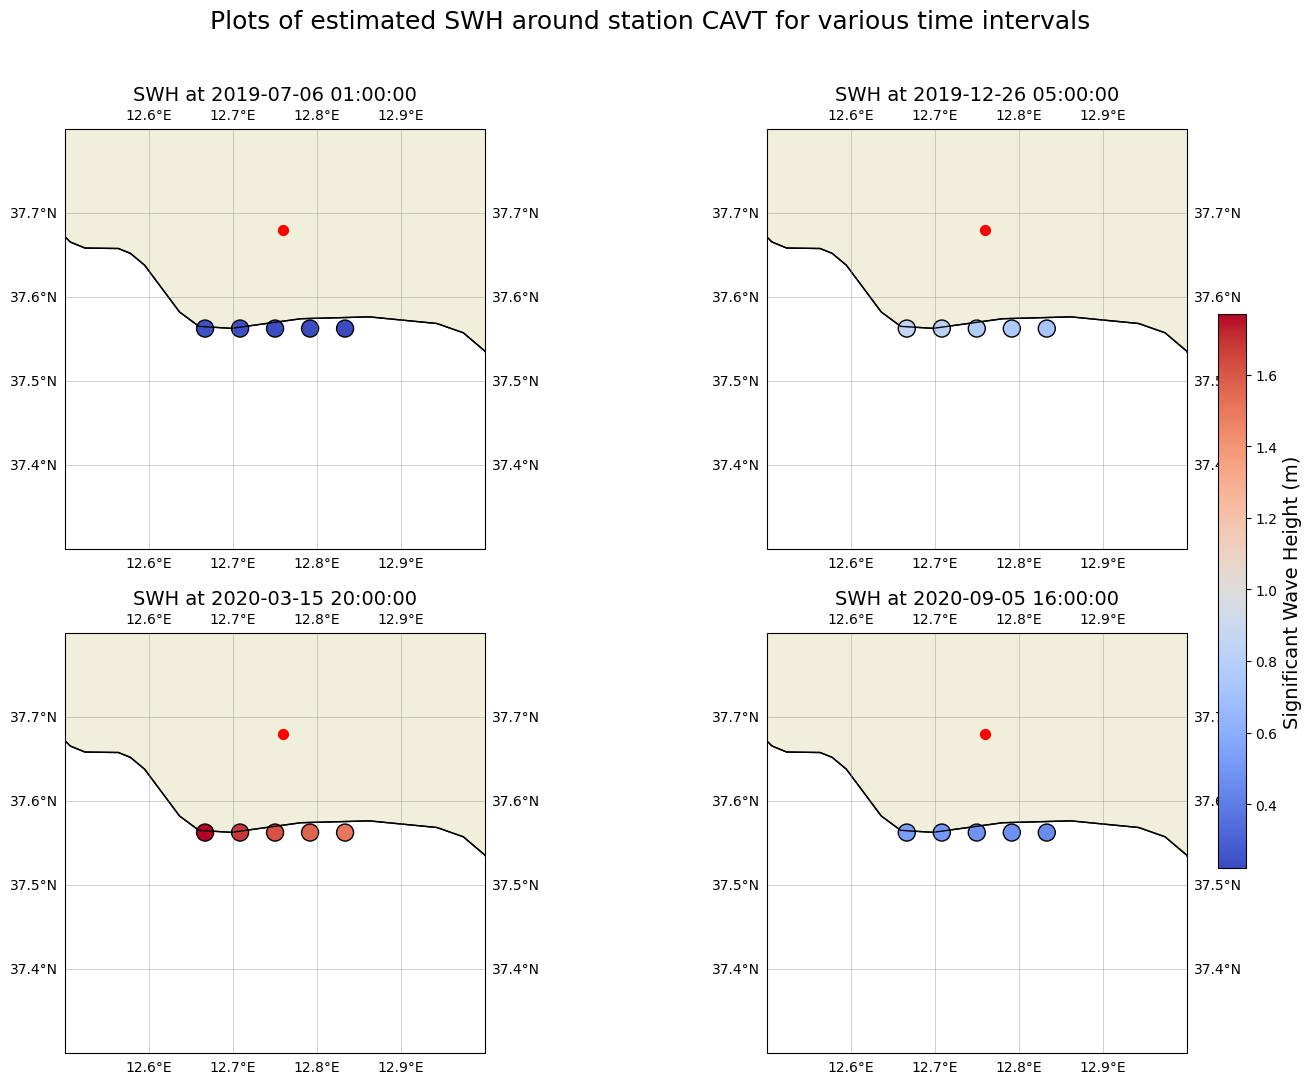

In [45]:
#Plot four timestamps in four subplots
best_Ypred.index = pd.to_datetime(best_Ypred.index)

selected_timestamps = [
    pd.to_datetime("2019-07-06 01:00:00"),
    pd.to_datetime("2019-12-26 05:00:00"),
    pd.to_datetime("2020-03-15 20:00:00"),
    pd.to_datetime("2020-09-05 16:00:00")
]

timestamps_to_plot = best_Ypred.loc[selected_timestamps]

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [12.5, 13.0, 37.3, 37.8]

#create the subplots
for timestamp, ax in zip(timestamps_to_plot.index, axes.flat):
    print(timestamp)

    #set map extent
    ax.set_extent(map_extent, crs=ccrs.PlateCarree())

    #add map features
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    #plot seismic stations - WDD
    ax.scatter(12.76, 37.68, color='red', marker='o', s=50, label='Seismic Stations')

    #get wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp, :]
    wave_heights = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords = wave_heights.index.to_list() #get the coordinates of the gridpoints
    lons, lats = zip(*coords)
    heights = wave_heights.values

    #scatter plot of wave heights
    sc = ax.scatter(lats, lons, c=heights, cmap='coolwarm', edgecolor='black', s=150, vmin=timestamps_to_plot.min().min(), vmax=timestamps_to_plot.max().max())

    #add title
    ax.set_title(f"SWH at {timestamp}", fontsize=14)

    #add gridlines
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

#colourbar
cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
cbar.set_label("Significant Wave Height (m)", fontsize=14)

fig.suptitle(f"Plots of estimated SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

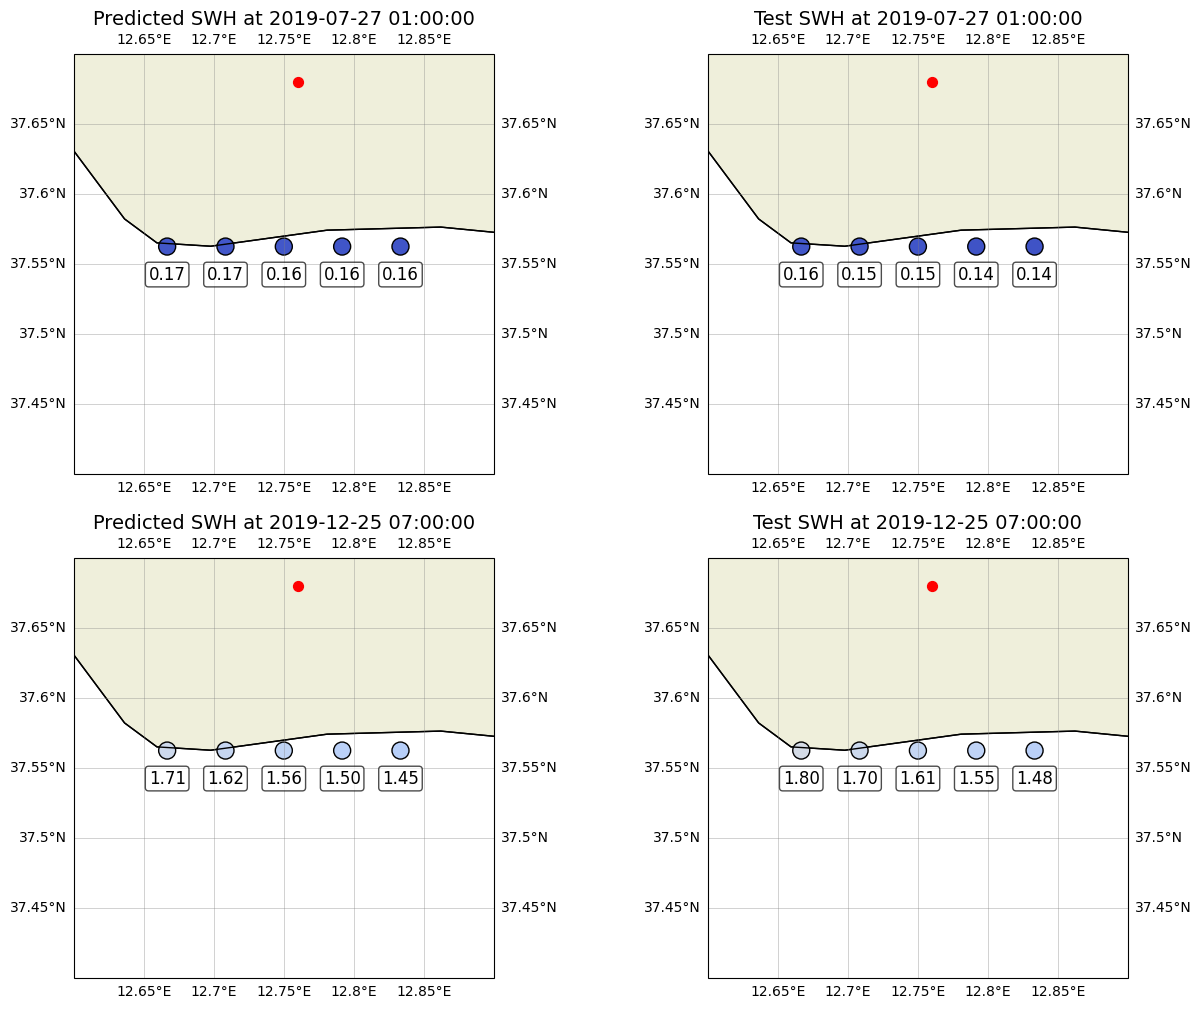

In [53]:
#Plot two timestamps in four subplots - one for pred and one for test for each timestamp
best_Ypred.index = pd.to_datetime(best_Ypred.index)
best_YTest.index = pd.to_datetime(best_YTest.index)

selected_timestamps = [
    pd.to_datetime("2019-07-27 01:00:00"),
    pd.to_datetime("2019-12-25 07:00:00")
]

timestamps_to_plot_pred = best_Ypred.loc[selected_timestamps]
timestamps_to_plot_test = best_YTest.loc[selected_timestamps]

#global min and max to give a consistent colour scale across all the subplots - first five cols contain SWH
vmin = min(best_Ypred.iloc[:, :5].min().min(), best_YTest.iloc[:, :5].min().min())
vmax = max(best_Ypred.iloc[:, :5].max().max(), best_YTest.iloc[:, :5].max().max())

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [12.6, 12.9, 37.4, 37.7]

for idx, (timestamp_pred, timestamp_test) in enumerate(zip(timestamps_to_plot_pred.index, timestamps_to_plot_test.index)):
    ax_pred, ax_test = axes[idx, 0], axes[idx, 1]
    
    #set map extent
    ax_pred.set_extent(map_extent, crs=ccrs.PlateCarree())
    ax_test.set_extent(map_extent, crs=ccrs.PlateCarree())
    
    #add map features
    for ax in [ax_pred, ax_test]:
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.scatter(12.76, 37.68, color='red', marker='o', s=50, label='Seismic Stations')
        ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

    #get PREDICTED wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp_pred, :]
    wave_heights_pred = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_pred = wave_heights_pred.index.to_list() #get the coordinates of the gridpoints
    lons_pred, lats_pred = zip(*coords_pred)
    heights_pred = wave_heights_pred.values
    
    #scatter plot for predicted wave heights
    sc_pred = ax_pred.scatter(lats_pred, lons_pred, c=heights_pred, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_pred.set_title(f"Predicted SWH at {timestamp_pred}", fontsize=14)

    for lat, lon, height in zip(lats_pred, lons_pred, heights_pred):
        ax_pred.text(lat, lon-0.02, f"{height:.2f}", fontsize=12, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

    #get TEST wave height data for this timestamp
    best_timestamp_Test = best_YTest.loc[timestamp_test, :]
    wave_heights_test = best_timestamp_Test.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_test = wave_heights_test.index.to_list() #get the coordinates of the gridpoints
    lons_test, lats_test = zip(*coords_test)
    heights_test = wave_heights_test.values

    #scatter plot for test wave heights
    sc_test = ax_test.scatter(lats_test, lons_test, c=heights_test, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_test.set_title(f"Test SWH at {timestamp_test}", fontsize=14)

    for lat, lon, height in zip(lats_test, lons_test, heights_test):
        ax_test.text(lat, lon-0.02, f"{height:.2f}", fontsize=12, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

#colourbar
#cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
#cbar.set_label("Significant Wave Height (m)", fontsize=14)

#fig.suptitle(f"Plots of estimated and actual SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

# Time Series

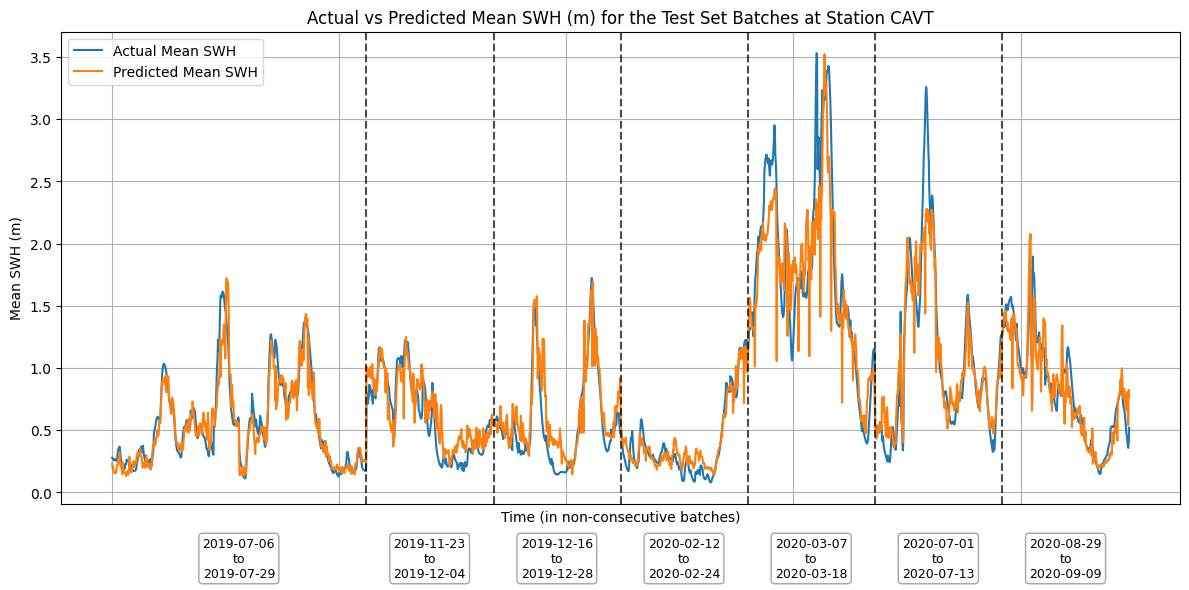

In [54]:
best_YTest.index = pd.to_datetime(best_YTest.index)
best_Ypred.index = pd.to_datetime(best_Ypred.index)

#YTest and Ypred share the same index
sea_mean_df = pd.DataFrame({'Actual': best_YTest.loc[best_Ypred.index, 'sea_mean'],
                            'Predicted': best_Ypred.loc[best_Ypred.index, 'sea_mean']
                           })

#reset the index to plot skipped parts where there is no data
sea_mean_df = sea_mean_df.reset_index()
sea_mean_df.rename(columns={'index': 'Timestamp'}, inplace=True)
sea_mean_df = sea_mean_df.sort_values('Timestamp').reset_index(drop=True)

#find when time gap is greater than 2 hours
time_deltas = sea_mean_df['Timestamp'].diff().dt.total_seconds() / 3600 #convert to hours
vline_spacing = time_deltas[time_deltas >= 2].index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sea_mean_df.index, sea_mean_df['Actual'], label='Actual Mean SWH')
ax.plot(sea_mean_df.index, sea_mean_df['Predicted'], label='Predicted Mean SWH')

#plot vertical lines
for x in vline_spacing:
    ax.axvline(x=x, color='black', alpha=0.7, linestyle='--')

#get xlabels
chunk_ends = [vline_spacing[0]-1] + [vline_spacing[j+1]-1 for j in range(len(vline_spacing)-1)] + [len(sea_mean_df)-1]
chunk_starts = [0] + vline_spacing

for start, end in zip(chunk_starts, chunk_ends):
    midpoint = (start + end) // 2
    start_time = sea_mean_df.loc[start, 'Timestamp'].strftime('%Y-%m-%d')
    end_time = sea_mean_df.loc[end, 'Timestamp'].strftime('%Y-%m-%d')
    label = f"{start_time}\nto\n{end_time}"

    ax.text(midpoint, -0.07, label, transform=ax.get_xaxis_transform(),
            ha='center', va='top', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.7))
    
#switch off default x ticks, major and minor, from the bottom and the top and remove xlabels
plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)

plt.xlabel("Time (in non-consecutive batches)")
plt.ylabel("Mean SWH (m)")
plt.title(f"Actual vs Predicted Mean SWH (m) for the Test Set Batches at Station {station}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()